<a href="https://colab.research.google.com/github/rvnalage/mtech_lp2_final_ner_submission/blob/main/named_entity_recognization_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install spacy scikit-learn matplotlib



In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [4]:
text = """India's Prime Minister Narendra Modi addressed the nation on Independence Day from the Red Fort in Delhi.
          The Indian Space Research Organisation (ISRO) successfully launched Chandrayaan-3, aiming for a lunar landing near the South Pole.
          Bollywood actor Shah Rukh Khan's latest movie, 'Pathaan,' broke box office records, grossing over ₹1000 crore worldwide.
          Reliance Industries, led by Mukesh Ambani, announced major investments in renewable energy and digital infrastructure.
          The Reserve Bank of India (RBI) maintained key interest rates to control inflation, while the Indian cricket team is preparing for the upcoming World Cup.
          Meanwhile, the monsoon season brought heavy rainfall to several states, including Maharashtra and Kerala, causing floods and landslides in some areas."""



In [5]:

doc = nlp(text)

for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")


Entity: India, Label: GPE
Entity: Narendra Modi, Label: PERSON
Entity: Independence Day, Label: EVENT
Entity: the Red Fort, Label: LOC
Entity: Delhi, Label: GPE
Entity: The Indian Space Research Organisation, Label: ORG
Entity: the South Pole, Label: LOC
Entity: Bollywood, Label: ORG
Entity: Shah Rukh Khan, Label: PERSON
Entity: 1000, Label: MONEY
Entity: Reliance Industries, Label: ORG
Entity: Mukesh Ambani, Label: PERSON
Entity: The Reserve Bank of India, Label: ORG
Entity: RBI, Label: ORG
Entity: Indian, Label: NORP
Entity: World Cup, Label: EVENT
Entity: Maharashtra, Label: NORP
Entity: Kerala, Label: GPE


In [6]:
from spacy import displacy

displacy.render(doc, style="ent", jupyter=True)


In [7]:
true_entities =[('India', 'GPE'), ('Narendra Modi', 'PERSON'), ('Independence Day', 'EVENT'), ('the Red Fort', 'LOC'), ('Delhi', 'GPE'), ('The Indian Space Research Organisation', 'ORG'), ('the South Pole', 'LOC'), ('Bollywood', 'ORG'), ('Shah Rukh Khan', 'PERSON'), ('1000', 'MONEY'), ('Reliance Industries', 'ORG'), ('Mukesh Ambani', 'PERSON'), ('The Reserve Bank of India', 'ORG'), ('RBI', 'ORG'), ('Indian', 'NORP'), ('World Cup', 'EVENT'), ('Maharashtra', 'NORP'), ('Kerala', 'GPE')]


In [8]:
predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]


In [9]:
print("True Entities:", true_entities)
print("Predicted Entities:", predicted_entities)


True Entities: [('India', 'GPE'), ('Narendra Modi', 'PERSON'), ('Independence Day', 'EVENT'), ('the Red Fort', 'LOC'), ('Delhi', 'GPE'), ('The Indian Space Research Organisation', 'ORG'), ('the South Pole', 'LOC'), ('Bollywood', 'ORG'), ('Shah Rukh Khan', 'PERSON'), ('1000', 'MONEY'), ('Reliance Industries', 'ORG'), ('Mukesh Ambani', 'PERSON'), ('The Reserve Bank of India', 'ORG'), ('RBI', 'ORG'), ('Indian', 'NORP'), ('World Cup', 'EVENT'), ('Maharashtra', 'NORP'), ('Kerala', 'GPE')]
Predicted Entities: [('India', 'GPE'), ('Narendra Modi', 'PERSON'), ('Independence Day', 'EVENT'), ('the Red Fort', 'LOC'), ('Delhi', 'GPE'), ('The Indian Space Research Organisation', 'ORG'), ('the South Pole', 'LOC'), ('Bollywood', 'ORG'), ('Shah Rukh Khan', 'PERSON'), ('1000', 'MONEY'), ('Reliance Industries', 'ORG'), ('Mukesh Ambani', 'PERSON'), ('The Reserve Bank of India', 'ORG'), ('RBI', 'ORG'), ('Indian', 'NORP'), ('World Cup', 'EVENT'), ('Maharashtra', 'NORP'), ('Kerala', 'GPE')]


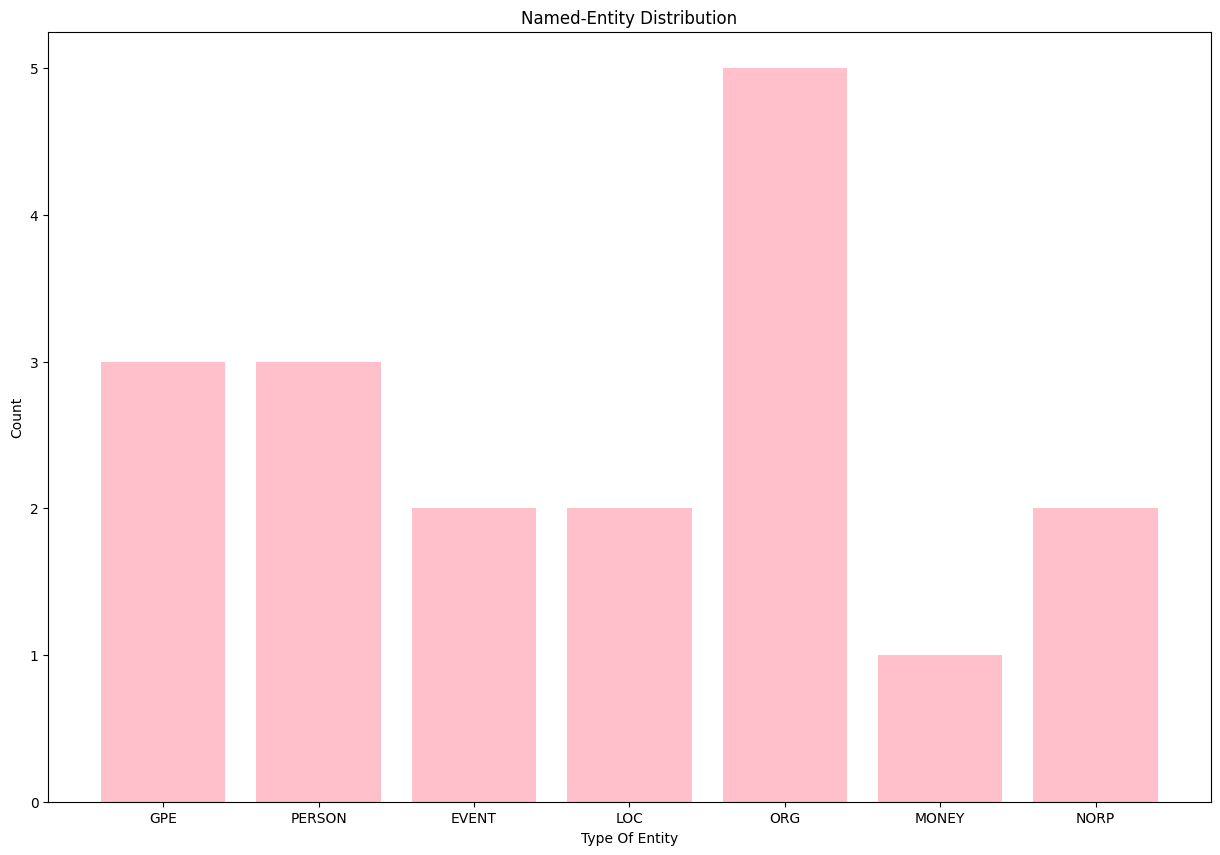

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Count entity labels
entity_counts = Counter(ent.label_ for ent in doc.ents)

# Plot bar chart
plt.figure(figsize=(15,10))
plt.bar(entity_counts.keys(), entity_counts.values(), color="pink")
plt.xlabel("Type Of Entity")
plt.ylabel("Count")
plt.title("Named-Entity Distribution")
plt.show()


In [12]:
from sklearn.metrics import precision_recall_fscore_support

# Extract labels from true and predicted entities
# Both true_labels and predicted_labels should be lists of strings
true_labels = [item[1] for item in true_entities]
predicted_labels = [item[1] for item in predicted_entities]

# Ensure both lists have the same length
min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Debugging: Print list lengths before computing scores
print("Length of true labels:", len(true_labels))
print("Length of predicted labels:", len(predicted_labels))

# Compute Precision, Recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels,
    predicted_labels,
    average="weighted",
    zero_division=1  # Prevents division errors
)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Length of true labels: 18
Length of predicted labels: 18
Precision: 1.00
Recall: 1.00
F1-score: 1.00


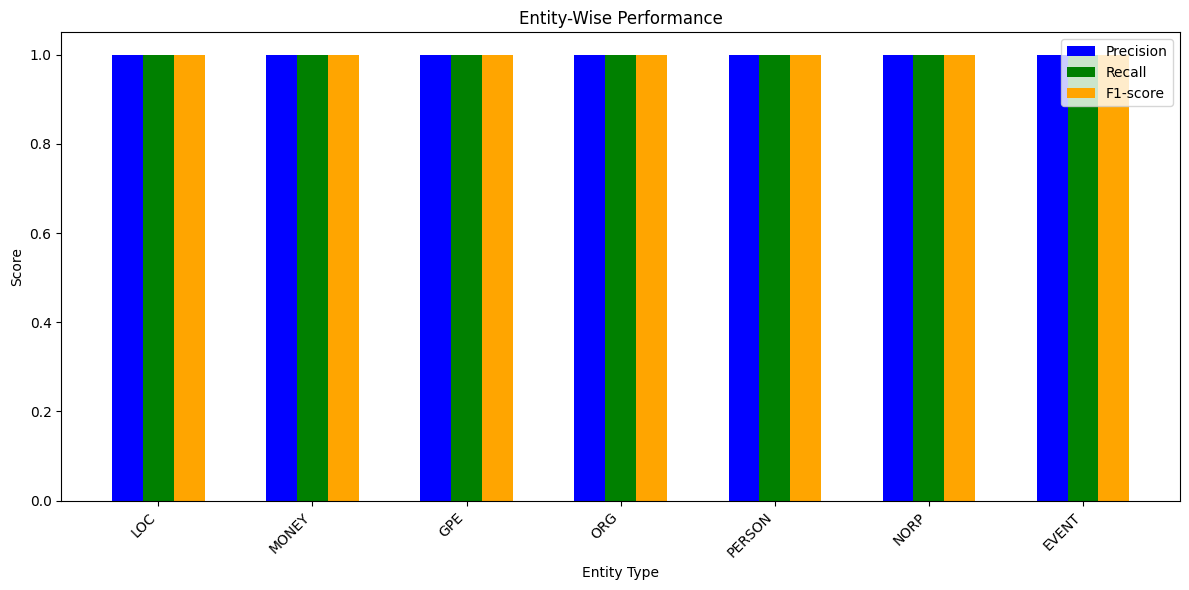

In [13]:
from sklearn.metrics import precision_recall_fscore_support

# ... (previous code for true_labels and predicted_labels) ...

# Calculate metrics for each entity type
# Convert set(true_labels) to a list to ensure consistent ordering
unique_labels = list(set(true_labels))
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, predicted_labels, average=None, labels=unique_labels, zero_division=1
)

# Create bar chart
entity_types = unique_labels  # Use the list of unique labels
x = range(len(entity_types))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x, precision, width, label="Precision", color="blue")
plt.bar([i + width for i in x], recall, width, label="Recall", color="green")
plt.bar([i + 2 * width for i in x], f1, width, label="F1-score", color="orange")

plt.xticks([i + width for i in x], entity_types, rotation=45, ha="right")
plt.xlabel("Entity Type")
plt.ylabel("Score")
plt.title("Entity-Wise Performance")
plt.legend()
plt.tight_layout()
plt.show()

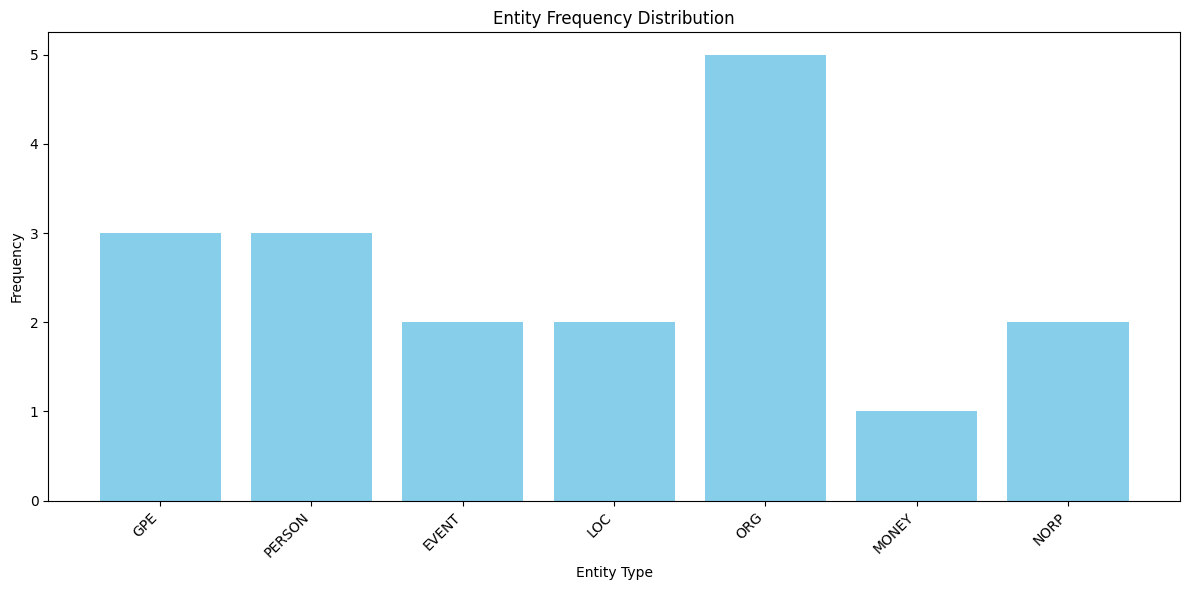

              precision    recall  f1-score   support

       EVENT       1.00      1.00      1.00         2
         GPE       1.00      1.00      1.00         3
         LOC       1.00      1.00      1.00         2
       MONEY       1.00      1.00      1.00         1
        NORP       1.00      1.00      1.00         2
         ORG       1.00      1.00      1.00         5
      PERSON       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# ... (Your existing code for true_entities, predicted_entities, true_labels, predicted_labels) ...

# 1. Entity Frequency Distribution:
entity_counts = Counter(ent.label_ for ent in doc.ents)
plt.figure(figsize=(12, 6))

plt.bar(entity_counts.keys(), entity_counts.values(), color="skyblue")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Entity Frequency Distribution")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# 2. Classification Report (Text):
report = classification_report(true_labels, predicted_labels, zero_division=1)
print(report)